In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = './data'

In [3]:
data_file = os.path.join(data_dir, 'london.csv')

df = pd.read_csv(data_file, index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         17414 non-null  object 
 1   shared_counts     17414 non-null  int64  
 2   real_temperature  17414 non-null  float64
 3   temperature       17414 non-null  float64
 4   humidity          17414 non-null  float64
 5   wind_speed        17414 non-null  float64
 6   weather_code      17414 non-null  int64  
 7   is_holiday        17414 non-null  bool   
 8   is_weekend        17414 non-null  bool   
 9   season_code       17414 non-null  int64  
 10  date              17414 non-null  object 
 11  season            17414 non-null  object 
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 1.5+ MB


In [5]:
current_palette = sns.color_palette("vlag")

sns.set_palette(current_palette)

base_color=current_palette[0]

---
---
---
---

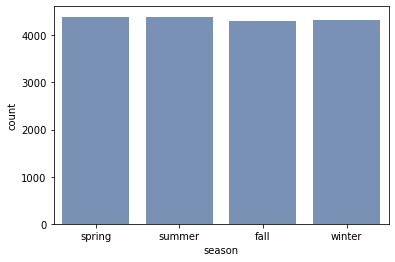

In [6]:
sns.countplot(
    x="season", 
    data=df, 
    order=['spring', 'summer', 'fall', 'winter'],
    color=base_color
)

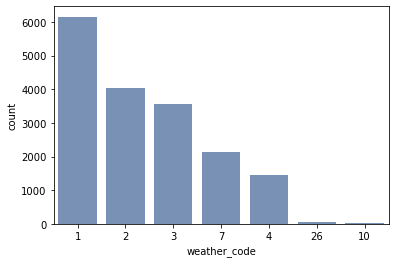

In [7]:
data = df['weather_code'].astype(str)

sns.countplot(
    x=data, 
    data=df, 
    order=data.value_counts().index,
    color=base_color
)

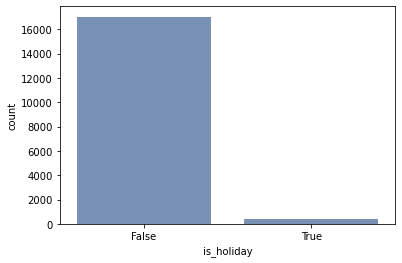

In [8]:
sns.countplot(x="is_holiday", data=df, color=base_color)

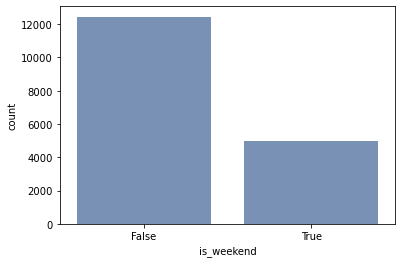

In [9]:
sns.countplot(x="is_weekend", data=df, color=base_color)

---
---

(array([ 417., 1567., 3489., 3478., 4139., 2520., 1340.,  359.,   77.,
          28.]),
 array([-1.5 ,  2.05,  5.6 ,  9.15, 12.7 , 16.25, 19.8 , 23.35, 26.9 ,
        30.45, 34.  ]),
 <a list of 10 Patch objects>)

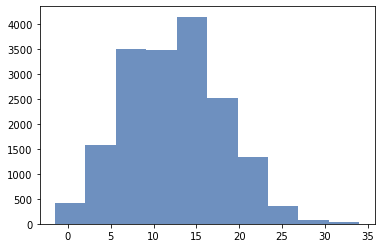

In [10]:
plt.hist(df['real_temperature'], color=base_color)

(array([ 103., 1235., 2825., 2454., 3619., 4000., 2358.,  649.,  138.,
          33.]),
 array([-6., -2.,  2.,  6., 10., 14., 18., 22., 26., 30., 34.]),
 <a list of 10 Patch objects>)

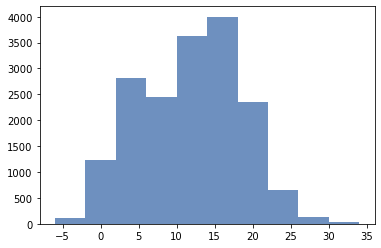

In [11]:
plt.hist(df['temperature'], color=base_color)

(array([  25.,  148.,  582., 1154., 1721., 2492., 3423., 3963., 2910.,
         996.]),
 array([ 20.5 ,  28.45,  36.4 ,  44.35,  52.3 ,  60.25,  68.2 ,  76.15,
         84.1 ,  92.05, 100.  ]),
 <a list of 10 Patch objects>)

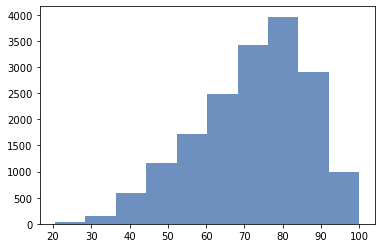

In [12]:
plt.hist(df['humidity'], color=base_color)

(array([1100., 4559., 4198., 4285., 1985.,  868.,  300.,   86.,   27.,
           6.]),
 array([ 0.  ,  5.65, 11.3 , 16.95, 22.6 , 28.25, 33.9 , 39.55, 45.2 ,
        50.85, 56.5 ]),
 <a list of 10 Patch objects>)

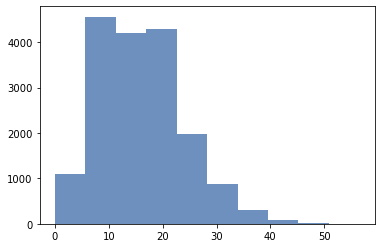

In [13]:
plt.hist(df['wind_speed'], color=base_color)

---
---

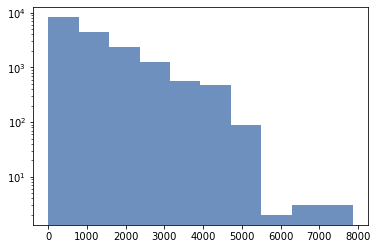

In [14]:
plt.hist(df['shared_counts'], color=base_color)

plt.yscale('log')

---
---
---

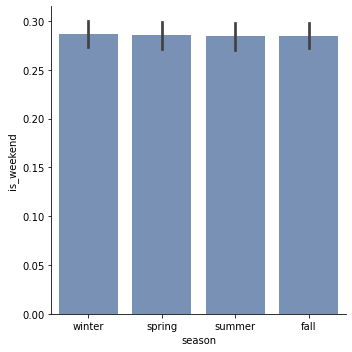

In [15]:
sns.catplot(x="season", y="is_weekend", data=df, kind='bar', color=base_color)

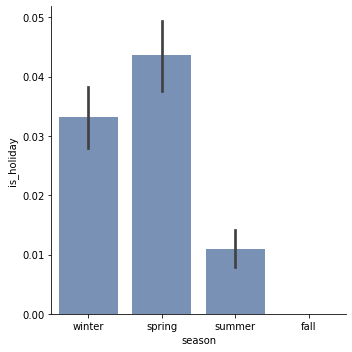

In [16]:
sns.catplot(
    x="season", 
    y="is_holiday", 
    data=df, 
    kind='bar',
    color=base_color
)

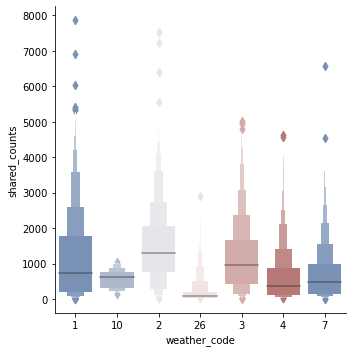

In [17]:
df_tmp = df.copy()

df_tmp['weather_code'] = df['weather_code'].astype(str)
df_tmp['season_code'] = df['season_code'].astype(str)

sns.catplot(x='weather_code', y='shared_counts', data=df_tmp, kind='boxen', palette=current_palette)

---
---
---

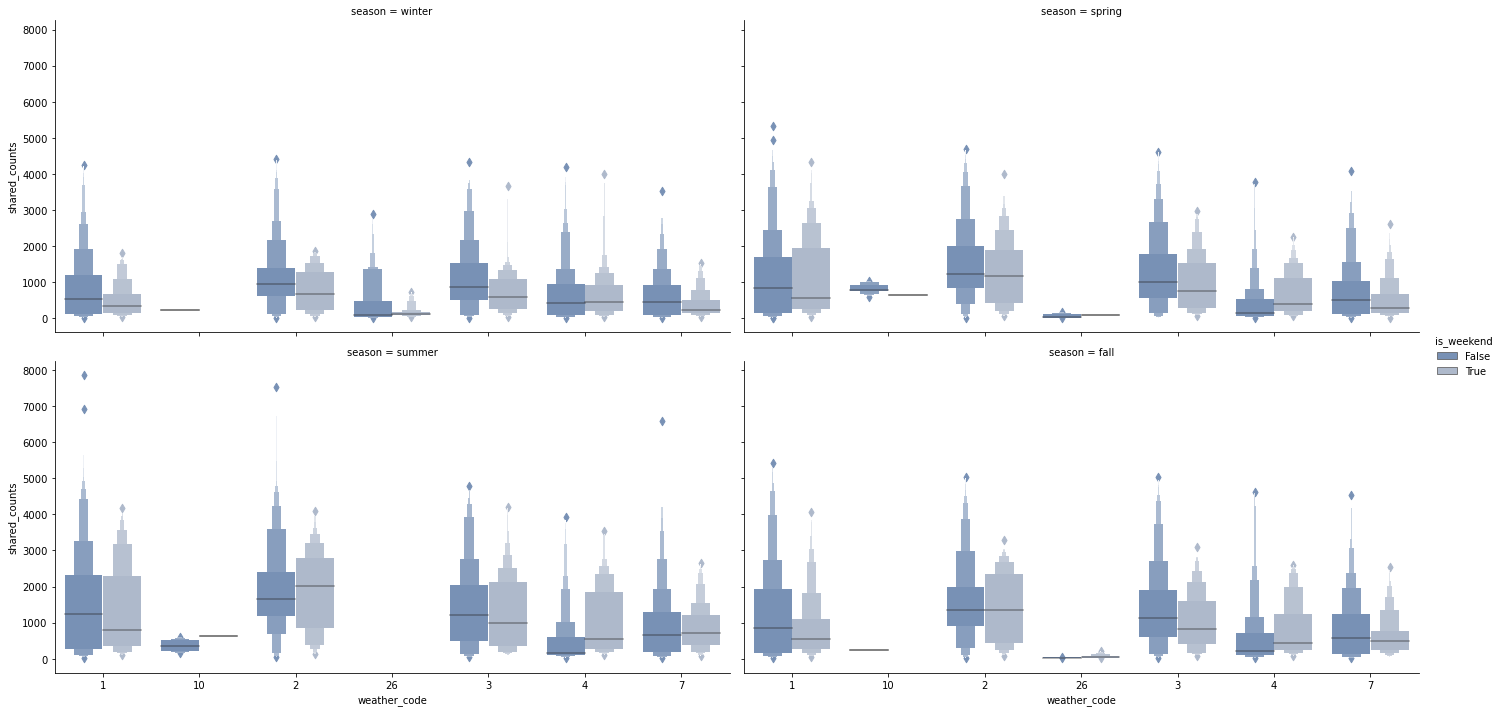

In [18]:
sns.catplot(
    x='weather_code', 
    y='shared_counts', 
    data=df_tmp, 
    kind='boxen', 
    col='season', 
    palette=current_palette,
    hue='is_weekend',
    col_wrap=2,
    height=5,
    aspect=2
)

In [75]:
plt.rcParams['figure.figsize'] = (8, 8)

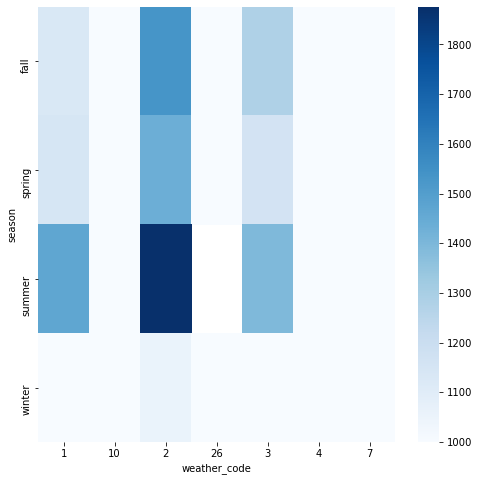

In [69]:
heatmap1_data = pd.pivot_table(df_tmp, values='shared_counts', 
                     index=['season'], 
                     columns='weather_code')
                    

sns.heatmap(heatmap1_data, vmin=1000, cmap="Blues")

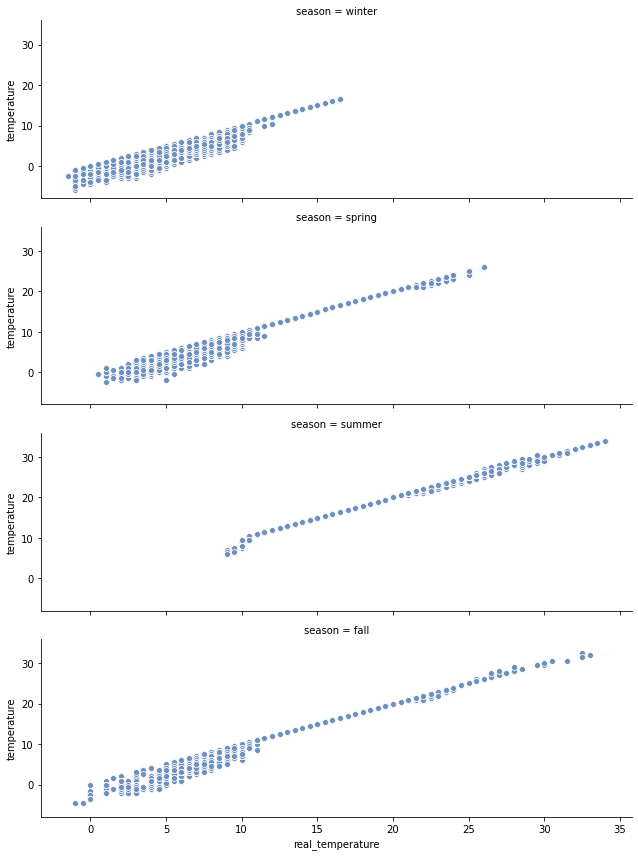

In [77]:
sns.relplot(x="real_temperature", y="temperature", data=df, row='season', height=3, aspect=3)

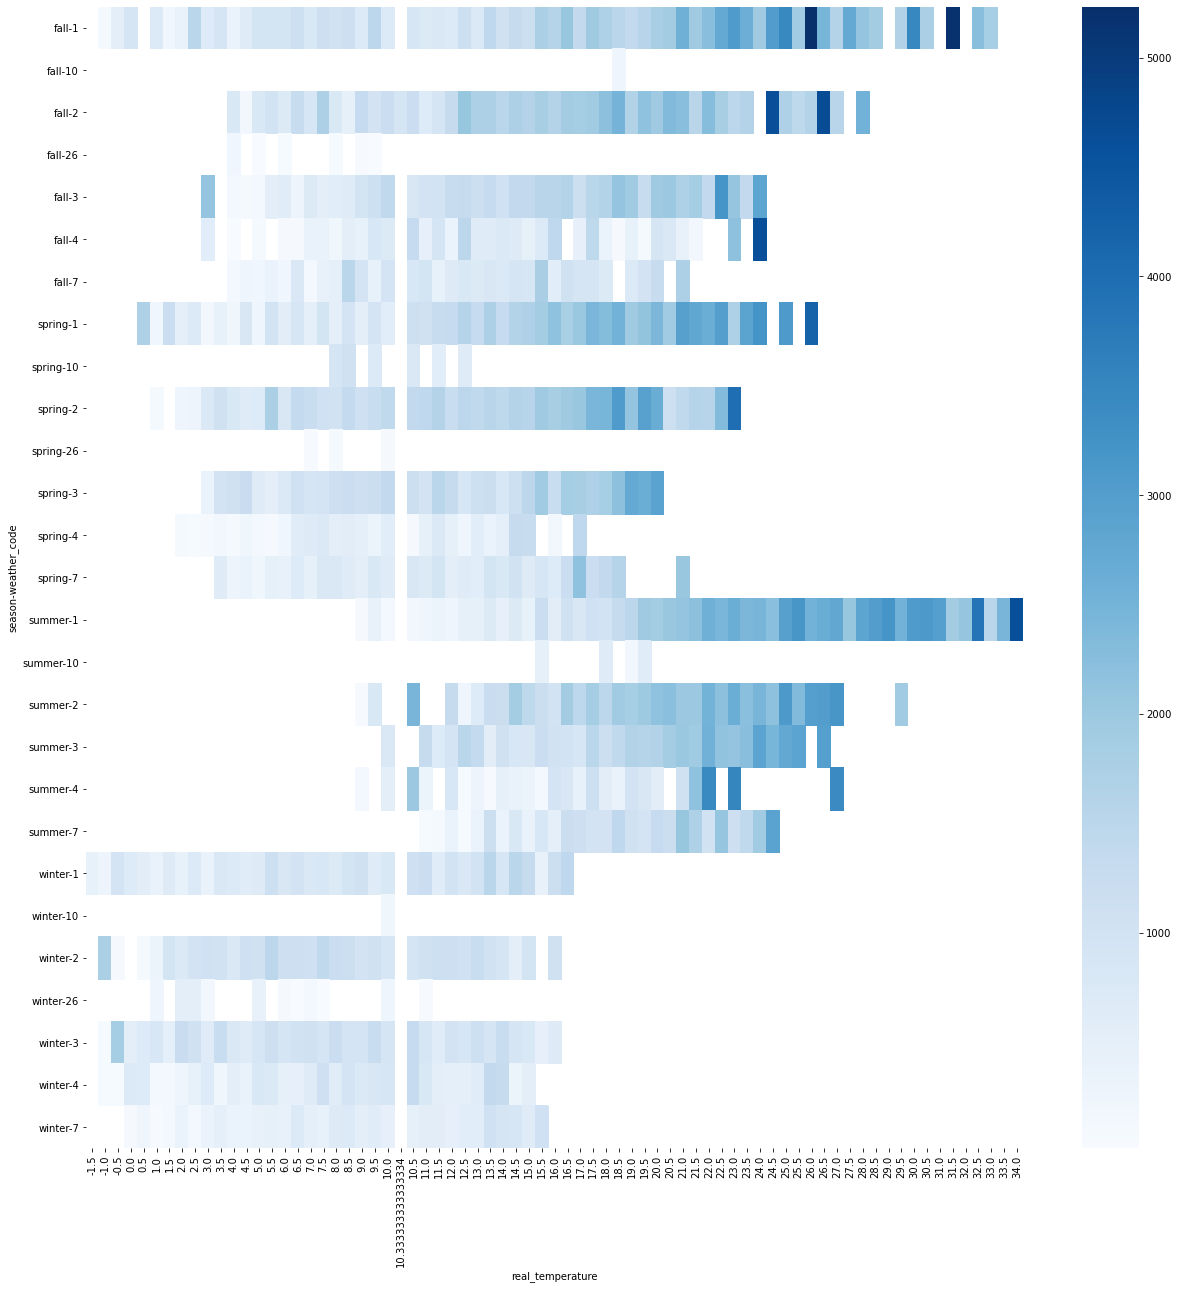

In [68]:
plt.rcParams['figure.figsize'] = (21, 21)

heatmap3_data = pd.pivot_table(df_tmp, values='shared_counts', 
                     index=['season', 'weather_code'], 
                     columns='real_temperature')
                    

sns.heatmap(heatmap3_data, cmap="Blues")